In [1]:
import json
import pandas as pd
import numpy as np

with open('/content/project_training.json', 'r', encoding='latin1') as fd:
  df = pd.read_json(fd)
  df["climate"] = df["climate"].replace({"yes": 0, "no": 1})
  df["sentiment"] = df["sentiment"].replace({"opportunity": 0, "neutral": 1, "risk": 2})
  df["specificity"] = df["specificity"].replace({"spec": 0, "non": 1})
  df["commitment"] = df["commitment"].replace({"yes": 0, "no": 1})
  print(df)

                                                  text  climate  sentiment  \
0    The accelerator programs have sub-portfolios o...        0        1.0   
1    Also by means of BNDES Finem, we offer credit ...        1        NaN   
2    Climate change Climate change exposes UPM to v...        0        2.0   
3    Several tools and methodologies aimed at asses...        0        2.0   
4    We worked with the UK government to accelerate...        0        0.0   
..                                                 ...      ...        ...   
395  At the beginning of 2019, VINCI Airports signe...        1        NaN   
396  We have also signed up to the Partnership for ...        0        2.0   
397  Suzano also is involved and spearheads externa...        0        1.0   
398  Risks to the Group’s reputation Risks include ...        1        NaN   
399  UBS is also involved in other activities to re...        0        1.0   

     commitment  specificity  
0           1.0          1.0  
1

In [2]:
#read test data
with open('/content/project_validation.json', 'r', encoding='latin1') as fd1:
  df_test = pd.read_json(fd1)

df_test["climate"] = df_test["climate"].replace({"yes": 0, "no": 1})
df_test["sentiment"] = df_test["sentiment"].replace({"opportunity": 0, "neutral": 1, "risk": 2})
df_test["specificity"] = df_test["specificity"].replace({"spec": 0, "non": 1})
df_test["commitment"] = df_test["commitment"].replace({"yes": 0, "no": 1})
print(df)

                                                  text  climate  sentiment  \
0    The accelerator programs have sub-portfolios o...        0        1.0   
1    Also by means of BNDES Finem, we offer credit ...        1        NaN   
2    Climate change Climate change exposes UPM to v...        0        2.0   
3    Several tools and methodologies aimed at asses...        0        2.0   
4    We worked with the UK government to accelerate...        0        0.0   
..                                                 ...      ...        ...   
395  At the beginning of 2019, VINCI Airports signe...        1        NaN   
396  We have also signed up to the Partnership for ...        0        2.0   
397  Suzano also is involved and spearheads externa...        0        1.0   
398  Risks to the Group’s reputation Risks include ...        1        NaN   
399  UBS is also involved in other activities to re...        0        1.0   

     commitment  specificity  
0           1.0          1.0  
1

In [3]:
import sklearn
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from nltk.stem import PorterStemmer
from nltk import word_tokenize

from scipy.sparse import csr_matrix

from nltk.corpus import stopwords
nltk.download('stopwords')
import seaborn as sns

nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
nltk.download('punkt')

#preprocessing text

stopwords = stopwords.words("english")
def old_prep(t):
  l = t.split()
  stemmer = PorterStemmer()
  l = [stemmer.stem(w) for w in l]
  l = [w for w in l if not any(i.isdigit() for i in w)]
  return ' '.join(l)

def prep(t):
  l = t.split()
  #stem
  stemmer = PorterStemmer()
  l = [stemmer.stem(w) for w in l]
  l = [w for w in l if w not in stopwords]
  l = [w for w in l if w.isalpha()]
  return ' '.join(l)
  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(400, 11759)
              precision    recall  f1-score   support

           0       0.83      1.00      0.90       329
           1       0.67      0.03      0.05        71

    accuracy                           0.82       400
   macro avg       0.75      0.51      0.48       400
weighted avg       0.80      0.82      0.75       400

['ab modul', 'abc program', 'abil attract', 'abil commerci', 'abil complet', 'abil deliv', 'abil effect', 'abil execut', 'abil mitig', 'abil obtain', 'abil provid', 'abil redevelop', 'abil resum', 'abil servic', 'abl automat', 'abl compens', 'abl convert', 'abl leverag', 'abl offset', 'abl oper', 'abl prescrib', 'abnorm weather', 'abov factor', 'abp commit', 'abr research', 'abreast corpor', 'absente ill', 'absolut greenhous', 'acceler clean', 'acceler collect', 'acceler inform', 'acceler program', 'acceler progress', 'acceler transit', 'accept autom', 'accept line', 'accept return', 'accept test', 'access alter', 'access among', 'access financi', 'acc

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


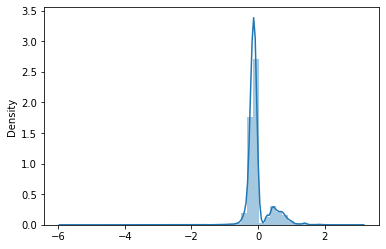

In [8]:
#logistic regression
m = LogisticRegression(penalty = 'none', class_weight = 'balanced')

vectorizer = CountVectorizer(preprocessor=prep, ngram_range = (2, 2))
X_train = vectorizer.fit_transform(df['text'])
y_train = df['climate']
m.fit(X_train.toarray(), y_train)
sns.distplot(m.coef_)

df.head()

#classification report

X_test = vectorizer.transform(df_test["text"])
#X_test_subset = csr_matrix(X_test[:, :4000])
y_test = df_test['climate']
print(X_test.shape)

pred_class = m.predict(X_test)
print(classification_report(y_test, pred_class))

clr = pd.DataFrame(classification_report(y_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("ngram.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    clr.to_excel(writer, sheet_name="clr")

print(vectorizer.get_feature_names())
print(X_train.shape)
print(X_train.toarray())
print(type(df['text']))

word_to_coef = dict(zip(vectorizer.get_feature_names(), m.coef_.squeeze()))
print(dict(sorted(word_to_coef.items(), key=lambda item: item[1])))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


              precision    recall  f1-score   support

           0       0.84      0.94      0.89       329
           1       0.38      0.17      0.23        71

    accuracy                           0.80       400
   macro avg       0.61      0.55      0.56       400
weighted avg       0.76      0.80      0.77       400



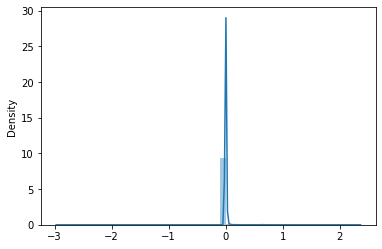

In [9]:
#Lasso
m1 = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', class_weight = 'balanced')
m1.fit(X_train, y_train)
sns.distplot(m1.coef_)

pred_class = m1.predict(X_test)
print(classification_report(y_test, pred_class))

classo = pd.DataFrame(classification_report(y_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("ngram.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    classo.to_excel(writer, sheet_name="classo")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


              precision    recall  f1-score   support

           0       0.83      1.00      0.90       329
           1       0.67      0.03      0.05        71

    accuracy                           0.82       400
   macro avg       0.75      0.51      0.48       400
weighted avg       0.80      0.82      0.75       400



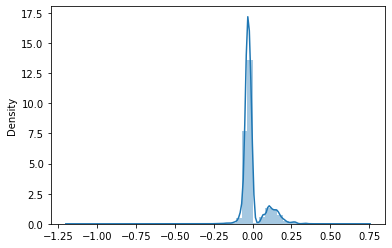

In [10]:
#Ridge
m2 = LogisticRegression(penalty='l2', C=1.0, class_weight = 'balanced')
m2.fit(X_train, y_train)
sns.distplot(m2.coef_)

pred_class = m2.predict(X_test)
print(classification_report(y_test, pred_class))

cri = pd.DataFrame(classification_report(y_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("ngram.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    cri.to_excel(writer, sheet_name="cri")

In [11]:
#SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model = SVC(kernel='rbf', C=1.0, class_weight = 'balanced')
model.fit(X_train, y_train)

pred_class = model.predict(X_test)
print(classification_report(y_test, pred_class))

csvm = pd.DataFrame(classification_report(y_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("ngram.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    csvm.to_excel(writer, sheet_name="csvm")

              precision    recall  f1-score   support

           0       0.83      0.99      0.90       329
           1       0.60      0.08      0.15        71

    accuracy                           0.83       400
   macro avg       0.72      0.54      0.53       400
weighted avg       0.79      0.83      0.77       400



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(400, 11759)
(400, 11759)
              precision    recall  f1-score   support

           0       0.83      0.99      0.91       329
           1       0.71      0.07      0.13        71

    accuracy                           0.83       400
   macro avg       0.77      0.53      0.52       400
weighted avg       0.81      0.83      0.77       400



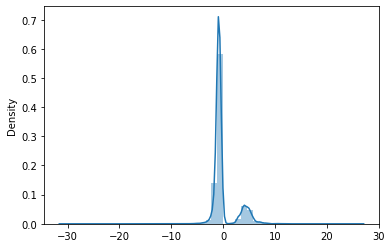

In [12]:
#TF-IDF
tf = TfidfVectorizer(preprocessor=prep, ngram_range = (2, 2), smooth_idf = True)
tfX_train = tf.fit_transform(df["text"])
y_train = df['climate']
m.fit(tfX_train, y_train)
sns.distplot(m.coef_)
print(tfX_train.shape)

tfX_test = tf.transform(df_test["text"])
y_test = df_test['climate']
print(tfX_test.shape)

pred_class = m.predict(tfX_test)
print(classification_report(y_test, pred_class))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


              precision    recall  f1-score   support

           0       0.83      0.99      0.91       329
           1       0.71      0.07      0.13        71

    accuracy                           0.83       400
   macro avg       0.77      0.53      0.52       400
weighted avg       0.81      0.83      0.77       400



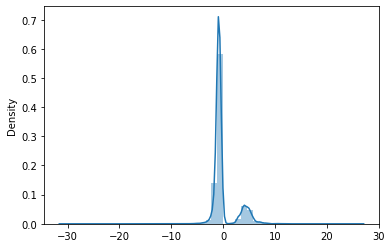

In [13]:
#logistic regression
#m = LogisticRegression(penalty = 'none')
m.fit(tfX_train, y_train)
pred_class = m.predict(tfX_test)
sns.distplot(m.coef_)
print(classification_report(y_test, pred_class))

ctflr = pd.DataFrame(classification_report(y_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("ngram.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    ctflr.to_excel(writer, sheet_name="ctflr")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


              precision    recall  f1-score   support

           0       1.00      0.20      0.33       329
           1       0.21      1.00      0.35        71

    accuracy                           0.34       400
   macro avg       0.61      0.60      0.34       400
weighted avg       0.86      0.34      0.33       400



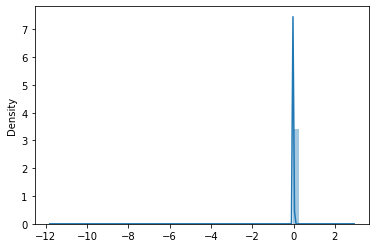

In [14]:
#Lasso
m1 = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', class_weight = 'balanced')
m1.fit(tfX_train, y_train)
sns.distplot(m1.coef_)

pred_class = m1.predict(tfX_test)
print(classification_report(y_test, pred_class))

ctfla = pd.DataFrame(classification_report(y_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("ngram.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    ctfla.to_excel(writer, sheet_name="ctfla")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


              precision    recall  f1-score   support

           0       0.83      0.99      0.91       329
           1       0.71      0.07      0.13        71

    accuracy                           0.83       400
   macro avg       0.77      0.53      0.52       400
weighted avg       0.81      0.83      0.77       400



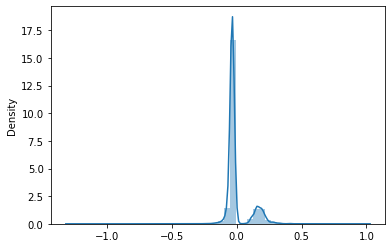

In [15]:
#Ridge
#m2 = LogisticRegression(penalty='l2', C=1.0)
m2.fit(tfX_train, y_train)
sns.distplot(m2.coef_)

pred_class = m2.predict(tfX_test)
print(classification_report(y_test, pred_class))

ctfri = pd.DataFrame(classification_report(y_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("ngram.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    ctfri.to_excel(writer, sheet_name="ctfri")

In [16]:
#SVM

model = SVC(kernel='rbf', C=1.0, class_weight = 'balanced')
model.fit(tfX_train, y_train)

pred_class = model.predict(tfX_test)
print(classification_report(y_test, pred_class))

ctfsvm = pd.DataFrame(classification_report(y_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("ngram.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    ctfsvm.to_excel(writer, sheet_name="ctfsvm")

              precision    recall  f1-score   support

           0       0.83      1.00      0.90       329
           1       0.67      0.03      0.05        71

    accuracy                           0.82       400
   macro avg       0.75      0.51      0.48       400
weighted avg       0.80      0.82      0.75       400



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


              precision    recall  f1-score   support

         0.0       0.65      0.38      0.48        81
         1.0       0.53      0.85      0.66       136
         2.0       0.84      0.48      0.61       112

    accuracy                           0.61       329
   macro avg       0.67      0.57      0.58       329
weighted avg       0.67      0.61      0.60       329



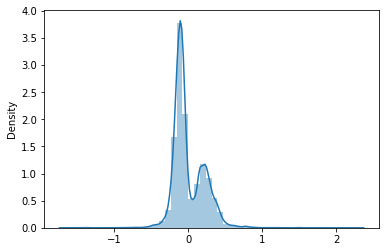

In [17]:
#sentiment
st = df[df['climate'] == 0]['text']
sv = df_test[df_test['climate'] == 0]['text']
sty = df[df['climate'] == 0]['sentiment']
svy = df_test[df_test['climate'] == 0]['sentiment']
sX_train = vectorizer.fit_transform(st)
sy_train = sty

#Logistic Regression
m.fit(sX_train.toarray(), sy_train)
sns.distplot(m.coef_)

#classification report
sX_test = vectorizer.transform(sv)
#X_test_subset = csr_matrix(X_test[:, :4000])
sy_test = svy
pred_class = m.predict(sX_test)
print(classification_report(sy_test, pred_class))

slr = pd.DataFrame(classification_report(sy_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("ngram.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    slr.to_excel(writer, sheet_name="slr")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


              precision    recall  f1-score   support

         0.0       0.55      0.41      0.47        81
         1.0       0.51      0.80      0.63       136
         2.0       0.79      0.40      0.53       112

    accuracy                           0.57       329
   macro avg       0.62      0.54      0.54       329
weighted avg       0.62      0.57      0.56       329



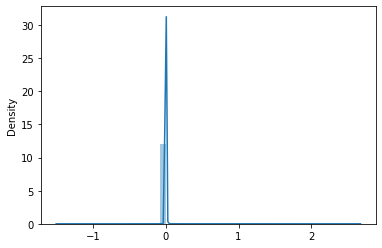

In [18]:
#Lasso
m1 = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', class_weight = 'balanced')
m1.fit(sX_train, sy_train)
sns.distplot(m1.coef_)

pred_class = m1.predict(sX_test)
print(classification_report(sy_test, pred_class))

sla = pd.DataFrame(classification_report(sy_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("ngram.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    sla.to_excel(writer, sheet_name="sla")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


              precision    recall  f1-score   support

         0.0       0.64      0.35      0.45        81
         1.0       0.53      0.87      0.66       136
         2.0       0.84      0.47      0.61       112

    accuracy                           0.60       329
   macro avg       0.67      0.56      0.57       329
weighted avg       0.66      0.60      0.59       329



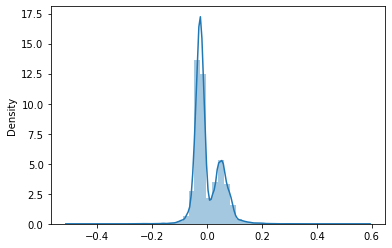

In [19]:
#Ridge
m2 = LogisticRegression(penalty='l2', C=1.0, class_weight = 'balanced')
m2.fit(sX_train, sy_train)
sns.distplot(m2.coef_)

pred_class = m2.predict(sX_test)
print(classification_report(sy_test, pred_class))

sri = pd.DataFrame(classification_report(sy_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("ngram.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    sri.to_excel(writer, sheet_name="sri")

In [20]:
#SVM

model = SVC(kernel='rbf', C=1.0, class_weight = 'balanced')
model.fit(sX_train, sy_train)

pred_class = model.predict(sX_test)
print(classification_report(sy_test, pred_class))

ssvm = pd.DataFrame(classification_report(sy_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("ngram.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    ssvm.to_excel(writer, sheet_name="ssvm")

              precision    recall  f1-score   support

         0.0       1.00      0.06      0.12        81
         1.0       0.44      0.99      0.61       136
         2.0       0.90      0.16      0.27       112

    accuracy                           0.48       329
   macro avg       0.78      0.41      0.33       329
weighted avg       0.74      0.48      0.38       329



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(329, 16108)
              precision    recall  f1-score   support

         0.0       0.67      0.62      0.64        81
         1.0       0.64      0.77      0.70       136
         2.0       0.87      0.71      0.78       112

    accuracy                           0.71       329
   macro avg       0.73      0.70      0.71       329
weighted avg       0.73      0.71      0.71       329



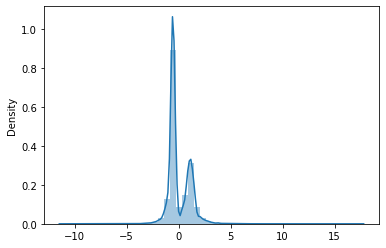

In [21]:
#TF-IDF
tf = TfidfVectorizer(ngram_range = (2, 2), smooth_idf = True)
s_tfX_train = tf.fit_transform(st)
sy_train = sty
m.fit(s_tfX_train, sy_train)
sns.distplot(m.coef_)

s_tfX_test = tf.transform(sv)
sy_test = svy
print(s_tfX_test.shape)

pred_class = m.predict(s_tfX_test)
print(classification_report(sy_test, pred_class))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


              precision    recall  f1-score   support

         0.0       0.67      0.62      0.64        81
         1.0       0.64      0.77      0.70       136
         2.0       0.87      0.71      0.78       112

    accuracy                           0.71       329
   macro avg       0.73      0.70      0.71       329
weighted avg       0.73      0.71      0.71       329



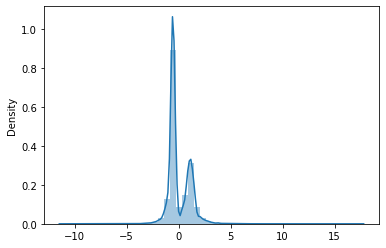

In [22]:
#logistic regression
m = LogisticRegression(penalty = 'none', class_weight = 'balanced')
m.fit(s_tfX_train, sy_train)
pred_class = m.predict(s_tfX_test)
sns.distplot(m.coef_)
print(classification_report(sy_test, pred_class))

stflr = pd.DataFrame(classification_report(sy_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("ngram.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    stflr.to_excel(writer, sheet_name="stflr")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/di

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        81
         1.0       0.46      0.88      0.61       136
         2.0       0.58      0.38      0.46       112

    accuracy                           0.49       329
   macro avg       0.35      0.42      0.35       329
weighted avg       0.39      0.49      0.41       329



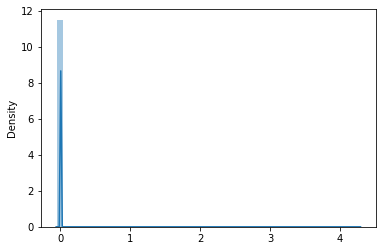

In [23]:
#Lasso
m1 = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', class_weight = 'balanced')
m1.fit(s_tfX_train, sy_train)
sns.distplot(m1.coef_)

pred_class = m1.predict(s_tfX_test)
print(classification_report(sy_test, pred_class))

stfla = pd.DataFrame(classification_report(sy_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("ngram.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    stfla.to_excel(writer, sheet_name="stfla")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


              precision    recall  f1-score   support

         0.0       0.66      0.63      0.65        81
         1.0       0.64      0.77      0.70       136
         2.0       0.88      0.70      0.78       112

    accuracy                           0.71       329
   macro avg       0.73      0.70      0.71       329
weighted avg       0.73      0.71      0.71       329



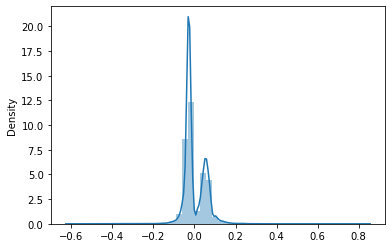

In [24]:
#Ridge
m2 = LogisticRegression(penalty='l2', C=1.0, class_weight = 'balanced')
m2.fit(s_tfX_train, sy_train)
sns.distplot(m2.coef_)

pred_class = m2.predict(s_tfX_test)
print(classification_report(sy_test, pred_class))

stfri = pd.DataFrame(classification_report(sy_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("ngram.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    stfri.to_excel(writer, sheet_name="stfri")

In [25]:
#SVM

model = SVC(kernel='rbf', C=1.0, class_weight = 'balanced')
model.fit(s_tfX_train, sy_train)

pred_class = model.predict(s_tfX_test)
print(classification_report(sy_test, pred_class))

stfsvm = pd.DataFrame(classification_report(sy_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("ngram.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    stfsvm.to_excel(writer, sheet_name="stfsvm")

              precision    recall  f1-score   support

         0.0       0.95      0.25      0.39        81
         1.0       0.51      0.99      0.67       136
         2.0       0.98      0.38      0.55       112

    accuracy                           0.60       329
   macro avg       0.81      0.54      0.54       329
weighted avg       0.78      0.60      0.56       329



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


              precision    recall  f1-score   support

         0.0       0.65      0.35      0.45       132
         1.0       0.67      0.87      0.76       197

    accuracy                           0.66       329
   macro avg       0.66      0.61      0.60       329
weighted avg       0.66      0.66      0.63       329



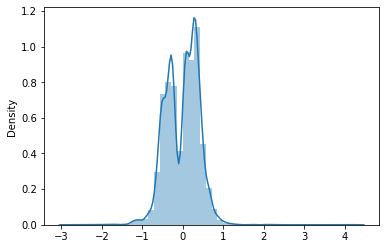

In [26]:
#specificity
spt = df[df['climate'] == 0]['text']
spv = df_test[df_test['climate'] == 0]['text']
spty = df[df['climate'] == 0]['specificity']
spvy = df_test[df_test['climate'] == 0]['specificity']
spX_train = vectorizer.fit_transform(spt)
spy_train = spty

#Logistic Regression
m.fit(spX_train.toarray(), spy_train)
sns.distplot(m.coef_)

#classification report
spX_test = vectorizer.transform(spv)
#X_test_subset = csr_matrix(X_test[:, :4000])
spy_test = spvy
pred_class = m.predict(spX_test)
print(classification_report(spy_test, pred_class))

splr = pd.DataFrame(classification_report(spy_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("ngram.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    splr.to_excel(writer, sheet_name="splr")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


              precision    recall  f1-score   support

         0.0       0.64      0.37      0.47       132
         1.0       0.67      0.86      0.75       197

    accuracy                           0.66       329
   macro avg       0.65      0.61      0.61       329
weighted avg       0.66      0.66      0.64       329



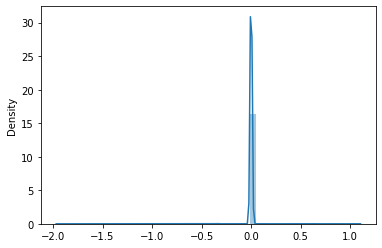

In [27]:
#Lasso
m1 = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', class_weight = 'balanced')
m1.fit(spX_train, spy_train)
sns.distplot(m1.coef_)

pred_class = m1.predict(spX_test)
print(classification_report(spy_test, pred_class))

spla = pd.DataFrame(classification_report(spy_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("ngram.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    spla.to_excel(writer, sheet_name="spla")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


              precision    recall  f1-score   support

         0.0       0.67      0.42      0.52       132
         1.0       0.69      0.86      0.76       197

    accuracy                           0.68       329
   macro avg       0.68      0.64      0.64       329
weighted avg       0.68      0.68      0.67       329



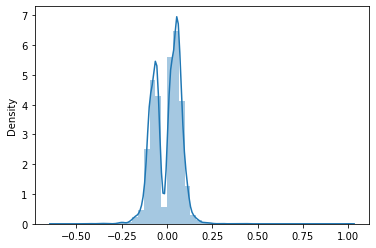

In [28]:
#Ridge
m2 = LogisticRegression(penalty='l2', C=1.0, class_weight = 'balanced')
m2.fit(spX_train, spy_train)
sns.distplot(m2.coef_)

pred_class = m2.predict(spX_test)
print(classification_report(spy_test, pred_class))

spri = pd.DataFrame(classification_report(spy_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("ngram.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    spri.to_excel(writer, sheet_name="spri")

In [29]:
#SVM

model = SVC(kernel='rbf', C=1.0, class_weight = 'balanced')
model.fit(spX_train, spy_train)

pred_class = model.predict(spX_test)
print(classification_report(spy_test, pred_class))

spsvm = pd.DataFrame(classification_report(spy_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("ngram.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    spsvm.to_excel(writer, sheet_name="spsvm")

              precision    recall  f1-score   support

         0.0       0.49      0.84      0.62       132
         1.0       0.80      0.42      0.55       197

    accuracy                           0.59       329
   macro avg       0.65      0.63      0.59       329
weighted avg       0.68      0.59      0.58       329



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(329, 16108)
              precision    recall  f1-score   support

         0.0       0.72      0.67      0.69       132
         1.0       0.79      0.82      0.80       197

    accuracy                           0.76       329
   macro avg       0.75      0.74      0.75       329
weighted avg       0.76      0.76      0.76       329



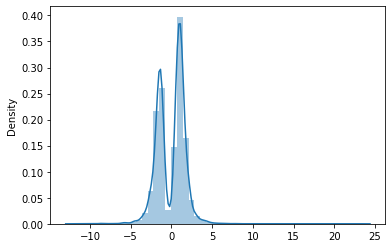

In [30]:
#TF-IDF
tf = TfidfVectorizer(ngram_range = (2, 2), smooth_idf = True)
sp_tfX_train = tf.fit_transform(spt)
spy_train = spty
m.fit(sp_tfX_train, spy_train)
sns.distplot(m.coef_)

sp_tfX_test = tf.transform(spv)
spy_test = spvy
print(sp_tfX_test.shape)

pred_class = m.predict(sp_tfX_test)
print(classification_report(spy_test, pred_class))


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


              precision    recall  f1-score   support

         0.0       0.72      0.67      0.69       132
         1.0       0.79      0.82      0.80       197

    accuracy                           0.76       329
   macro avg       0.75      0.74      0.75       329
weighted avg       0.76      0.76      0.76       329



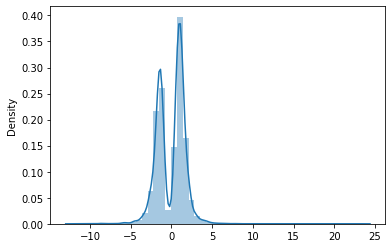

In [31]:
#logistic regression
m = LogisticRegression(penalty = 'none', class_weight = 'balanced')
m.fit(sp_tfX_train, spy_train)
pred_class = m.predict(sp_tfX_test)
sns.distplot(m.coef_)
print(classification_report(spy_test, pred_class))

sptflr = pd.DataFrame(classification_report(spy_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("ngram.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    sptflr.to_excel(writer, sheet_name="sptflr")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


              precision    recall  f1-score   support

         0.0       0.43      0.83      0.56       132
         1.0       0.69      0.26      0.38       197

    accuracy                           0.49       329
   macro avg       0.56      0.54      0.47       329
weighted avg       0.59      0.49      0.46       329



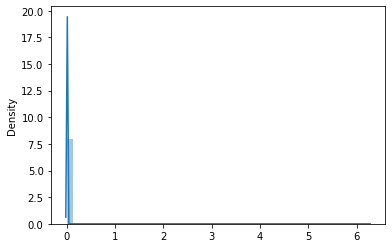

In [32]:
#Lasso
m1 = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', class_weight = 'balanced')
m1.fit(sp_tfX_train, spy_train)
sns.distplot(m1.coef_)

pred_class = m1.predict(sp_tfX_test)
print(classification_report(spy_test, pred_class))

sptfla = pd.DataFrame(classification_report(spy_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("ngram.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    sptfla.to_excel(writer, sheet_name="sptfla")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


              precision    recall  f1-score   support

         0.0       0.69      0.68      0.68       132
         1.0       0.79      0.79      0.79       197

    accuracy                           0.75       329
   macro avg       0.74      0.74      0.74       329
weighted avg       0.75      0.75      0.75       329



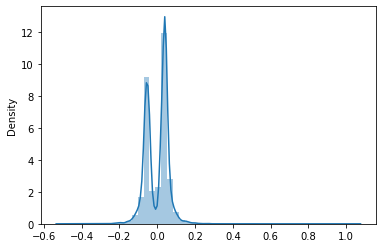

In [33]:
#Ridge
m2 = LogisticRegression(penalty='l2', C=1.0, class_weight = 'balanced')
m2.fit(sp_tfX_train, spy_train)
sns.distplot(m2.coef_)

pred_class = m2.predict(sp_tfX_test)
print(classification_report(spy_test, pred_class))

sptfri = pd.DataFrame(classification_report(spy_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("ngram.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    sptfri.to_excel(writer, sheet_name="sptfri")

In [34]:
#SVM

model = SVC(kernel='rbf', C=1.0, class_weight = 'balanced')
model.fit(sp_tfX_train, spy_train)

pred_class = model.predict(sp_tfX_test)
print(classification_report(spy_test, pred_class))

sptfsvm = pd.DataFrame(classification_report(spy_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("ngram.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    sptfsvm.to_excel(writer, sheet_name="sptfsvm")

              precision    recall  f1-score   support

         0.0       0.76      0.45      0.57       132
         1.0       0.71      0.90      0.80       197

    accuracy                           0.72       329
   macro avg       0.74      0.68      0.68       329
weighted avg       0.73      0.72      0.71       329



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


              precision    recall  f1-score   support

         0.0       0.59      0.73      0.65       139
         1.0       0.76      0.64      0.69       190

    accuracy                           0.67       329
   macro avg       0.68      0.68      0.67       329
weighted avg       0.69      0.67      0.68       329



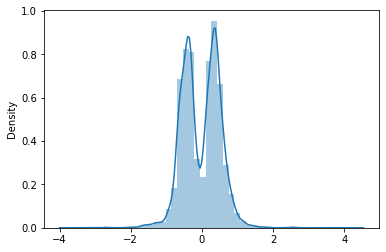

In [35]:
#commitment
ct = df[df['climate'] == 0]['text']
cv = df_test[df_test['climate'] == 0]['text']
cty = df[df['climate'] == 0]['commitment']
cvy = df_test[df_test['climate'] == 0]['commitment']
cX_train = vectorizer.fit_transform(ct)
cy_train =cty

#Logistic Regression
m.fit(cX_train.toarray(), cy_train)
sns.distplot(m.coef_)

#classification report
cX_test = vectorizer.transform(cv)
#X_test_subset = csr_matrix(X_test[:, :4000])
cy_test = cvy
pred_class = m.predict(cX_test)
print(classification_report(cy_test, pred_class))

cmlr = pd.DataFrame(classification_report(cy_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("ngram.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    cmlr.to_excel(writer, sheet_name="cmlr")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


              precision    recall  f1-score   support

         0.0       0.54      0.83      0.65       139
         1.0       0.79      0.48      0.60       190

    accuracy                           0.63       329
   macro avg       0.66      0.65      0.62       329
weighted avg       0.68      0.63      0.62       329



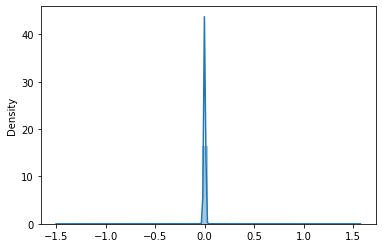

In [36]:
#Lasso
m1 = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', class_weight = 'balanced')
m1.fit(cX_train, cy_train)
sns.distplot(m1.coef_)

pred_class = m1.predict(cX_test)
print(classification_report(cy_test, pred_class))

cmla = pd.DataFrame(classification_report(cy_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("ngram.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    cmla.to_excel(writer, sheet_name="cmla")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


              precision    recall  f1-score   support

         0.0       0.69      0.61      0.65       139
         1.0       0.74      0.80      0.77       190

    accuracy                           0.72       329
   macro avg       0.71      0.71      0.71       329
weighted avg       0.72      0.72      0.72       329



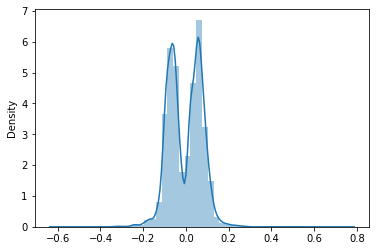

In [37]:
#Ridge
m2 = LogisticRegression(penalty='l2', C=1.0, class_weight = 'balanced')
m2.fit(cX_train, cy_train)
sns.distplot(m2.coef_)

pred_class = m2.predict(cX_test)
print(classification_report(cy_test, pred_class))

cmri = pd.DataFrame(classification_report(cy_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("ngram.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    cmri.to_excel(writer, sheet_name="cmri")

In [38]:
#SVM

model = SVC(kernel='rbf', C=1.0, class_weight = 'balanced')
model.fit(cX_train, cy_train)

pred_class = model.predict(cX_test)
print(classification_report(cy_test, pred_class))

cmsvm = pd.DataFrame(classification_report(cy_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("ngram.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    cmsvm.to_excel(writer, sheet_name="cmsvm")

              precision    recall  f1-score   support

         0.0       0.76      0.12      0.20       139
         1.0       0.60      0.97      0.74       190

    accuracy                           0.61       329
   macro avg       0.68      0.54      0.47       329
weighted avg       0.67      0.61      0.51       329



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(329, 16108)
              precision    recall  f1-score   support

         0.0       0.70      0.83      0.76       139
         1.0       0.86      0.74      0.80       190

    accuracy                           0.78       329
   macro avg       0.78      0.79      0.78       329
weighted avg       0.79      0.78      0.78       329



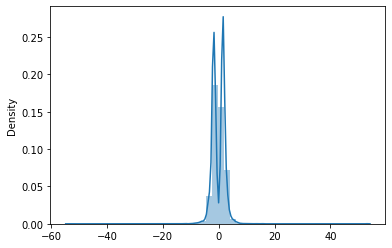

In [39]:
#TF-IDF
tf = TfidfVectorizer(ngram_range = (2,2), smooth_idf = True)
c_tfX_train = tf.fit_transform(ct)
cy_train = cty
m.fit(c_tfX_train, cy_train)
sns.distplot(m.coef_)

c_tfX_test = tf.transform(cv)
cy_test = cvy
print(c_tfX_test.shape)

pred_class = m.predict(c_tfX_test)
print(classification_report(cy_test, pred_class))


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


              precision    recall  f1-score   support

         0.0       0.70      0.83      0.76       139
         1.0       0.86      0.74      0.80       190

    accuracy                           0.78       329
   macro avg       0.78      0.79      0.78       329
weighted avg       0.79      0.78      0.78       329



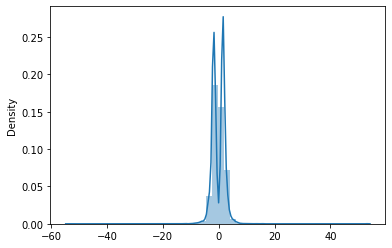

In [40]:
#logistic regression
m = LogisticRegression(penalty = 'none', class_weight = 'balanced')
m.fit(c_tfX_train, cy_train)
pred_class = m.predict(c_tfX_test)
sns.distplot(m.coef_)
print(classification_report(cy_test, pred_class))

cmtflr = pd.DataFrame(classification_report(cy_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("ngram.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    cmtflr.to_excel(writer, sheet_name="cmtflr")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


              precision    recall  f1-score   support

         0.0       0.46      0.84      0.60       139
         1.0       0.71      0.28      0.40       190

    accuracy                           0.52       329
   macro avg       0.58      0.56      0.50       329
weighted avg       0.60      0.52      0.48       329



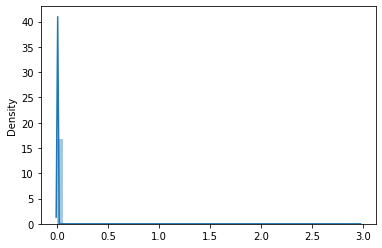

In [41]:
#Lasso
m1 = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', class_weight = 'balanced')
m1.fit(c_tfX_train, cy_train)
sns.distplot(m1.coef_)

pred_class = m1.predict(c_tfX_test)
print(classification_report(cy_test, pred_class))

cmtfla = pd.DataFrame(classification_report(cy_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("ngram.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    cmtfla.to_excel(writer, sheet_name="cmtfla")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


              precision    recall  f1-score   support

         0.0       0.69      0.83      0.76       139
         1.0       0.86      0.73      0.79       190

    accuracy                           0.78       329
   macro avg       0.78      0.78      0.77       329
weighted avg       0.79      0.78      0.78       329



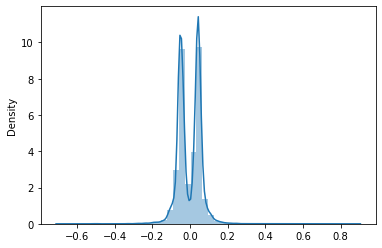

In [42]:
#Ridge
m2 = LogisticRegression(penalty='l2', C=1.0, class_weight = 'balanced')
m2.fit(c_tfX_train, cy_train)
sns.distplot(m2.coef_)

pred_class = m2.predict(c_tfX_test)
print(classification_report(cy_test, pred_class))

cmtfri = pd.DataFrame(classification_report(cy_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("ngram.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    cmtfri.to_excel(writer, sheet_name="cmtfri")

In [43]:
#SVM

model = SVC(kernel='rbf', C=1.0, class_weight = 'balanced')
model.fit(c_tfX_train, cy_train)

pred_class = model.predict(c_tfX_test)
print(classification_report(cy_test, pred_class))

cmtfsvm = pd.DataFrame(classification_report(cy_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("ngram.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    cmtfsvm.to_excel(writer, sheet_name="cmtfsvm")

              precision    recall  f1-score   support

         0.0       0.72      0.80      0.76       139
         1.0       0.84      0.77      0.81       190

    accuracy                           0.78       329
   macro avg       0.78      0.79      0.78       329
weighted avg       0.79      0.78      0.79       329

